In [1]:
# Loading of  data sets

In [2]:
import pandas as pd
import numpy as np
import warnings


In [3]:
warnings.filterwarnings('ignore')


In [4]:
df1= pd.read_csv('/Users/pk/Desktop/Python for DS course/ml-100k/u.data',sep='\t',header=None)
df1.columns=['user_id','item_id','rating','timestamp']
print(df1.head())
print(df1.shape)

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
(100000, 4)


In [5]:
print('No of unique user',df1['user_id'].nunique())
print('No of unique movies', df1['item_id'].nunique())

No of unique user 943
No of unique movies 1682


In [6]:
df2= pd.read_csv('/Users/pk/Desktop/Python for DS course/ml-100k/u.item',sep='\|',header=None)
df2.head()
df2= df2[[0,1]]
df2.head()
df2.columns=['item_id','Name of Movie']
df2.head()

,item_id,Name of Movie
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
combine_df=pd.merge(df1,df2,on='item_id')
combine_df.head()

,user_id,item_id,rating,timestamp,Name of Movie
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [8]:
## Exploratory Analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
combine_df.groupby('Name of Movie').mean()['rating'].sort_values(ascending=False)

Name of Movie
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [12]:
combine_df.groupby('Name of Movie').count()['rating']

Name of Movie
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
� k�ldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [17]:
Final_df= pd.merge(combine_df.groupby('Name of Movie').mean()['rating'],combine_df.groupby('Name of Movie').count()['rating'],on='Name of Movie')
Final_df.columns=['Average Rating','No of Ratings']
Final_df.head()

,Average Rating,No of Ratings
Name of Movie,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


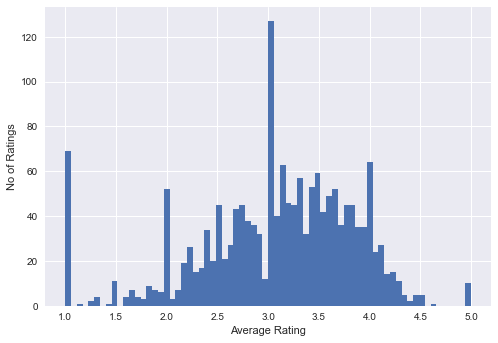

In [22]:
plt.style.use('seaborn')
plt.hist(Final_df['Average Rating'],bins=70)
plt.xlabel('Average Rating')
plt.ylabel('No of Ratings')
plt.show()


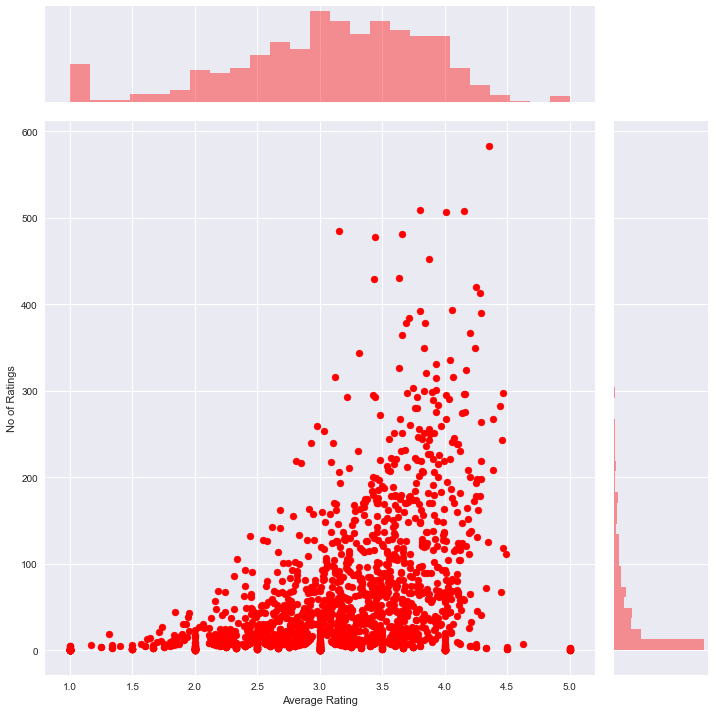

In [36]:
sns.jointplot(Final_df['Average Rating'],
              Final_df['No of Ratings'],kind='scatter',color='Red',height=10)
plt.show()

In [31]:
sns.jointplot?

In [37]:
df1.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [39]:
movie_matrix=combine_df.pivot_table(values='rating',index='user_id',columns='Name of Movie')
movie_matrix


Name of Movie,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
Final_df.sort_values('No of Ratings',ascending=False)


,Average Rating,No of Ratings
Name of Movie,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [42]:
star_wars_user_ratings= movie_matrix['Star Wars (1977)']
star_wars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [46]:
similar_to_starwars= movie_matrix.corrwith(star_wars_user_ratings)
similar_to_starwars

Name of Movie
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [51]:
corr_with_starwars=pd.DataFrame(similar_to_starwars,columns=['corr'])
corr_with_starwars

,corr
Name of Movie,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [53]:
corr_with_starwars.dropna(inplace=True)
corr_with_starwars


,corr
Name of Movie,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [54]:
corr_with_starwars.head()

,corr
Name of Movie,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [56]:
corr_with_starwars=corr_with_starwars.join(Final_df['No of Ratings'])

In [57]:
corr_with_starwars.head()

,corr,No of Ratings
Name of Movie,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [61]:
starwar_recommend=corr_with_starwars[corr_with_starwars['No of Ratings']>100].sort_values('corr',ascending=False)

In [62]:
starwar_recommend.head(10)

,corr,No of Ratings
Name of Movie,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [73]:
def prediction(movieName):
    movieToTest=movieName
    user_ratings= movie_matrix[movieToTest]
    similar_to_movie= movie_matrix.corrwith(user_ratings)
    corr_with_movie=pd.DataFrame(similar_to_movie,columns=['corr'])
    corr_with_movie.dropna(inplace=True)
    corr_with_movie=corr_with_movie.join(Final_df['No of Ratings'])
    movie_recommend=corr_with_movie[corr_with_movie['No of Ratings']>100].sort_values('corr',ascending=False)
    return movie_recommend.head(10)

In [74]:
print(prediction('Titanic (1997)'))

                                                   corr  No of Ratings
Name of Movie                                                         
Titanic (1997)                                 1.000000            350
River Wild, The (1994)                         0.497600            146
Abyss, The (1989)                              0.472103            151
Bram Stoker's Dracula (1992)                   0.443560            120
True Lies (1994)                               0.435104            208
William Shakespeare's Romeo and Juliet (1996)  0.430243            106
Last of the Mohicans, The (1992)               0.427239            128
Outbreak (1995)                                0.426237            104
Die Hard (1988)                                0.403124            243
Frighteners, The (1996)                        0.398516            115
